In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os

In [8]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    """Add salt & pepper noise."""
    noisy = np.copy(image)
    total_pixels = image.size

    # Salt (white)
    num_salt = int(salt_prob * total_pixels)
    coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy[coords[0], coords[1]] = 255

    # Pepper (black)
    num_pepper = int(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1]] = 0

    return noisy

def add_impulse_noise(image, noise_prob=0.02):
    """Add random impulse noise."""
    noisy = np.copy(image)
    total_pixels = image.size
    num_noisy = int(noise_prob * total_pixels)
    coords = [np.random.randint(0, i, num_noisy) for i in image.shape]
    random_vals = np.random.randint(0, 256, num_noisy)
    noisy[coords[0], coords[1]] = random_vals
    return noisy

def add_speckle_noise(image, sigma=0.2):
    """Add multiplicative speckle noise."""
    noise = np.random.randn(*image.shape) * sigma
    noisy = image.astype(np.float32) + image.astype(np.float32) * noise
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy


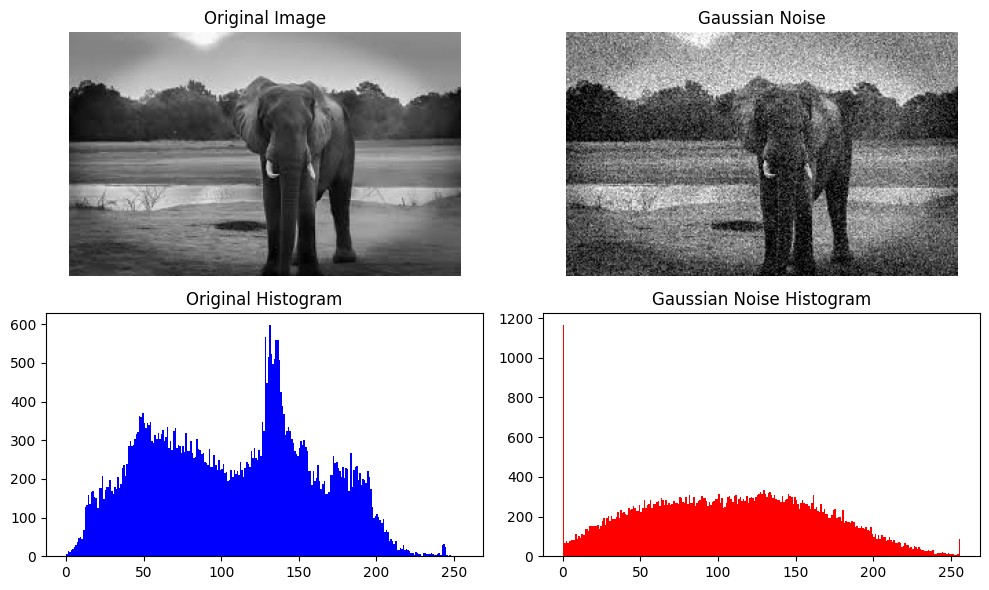

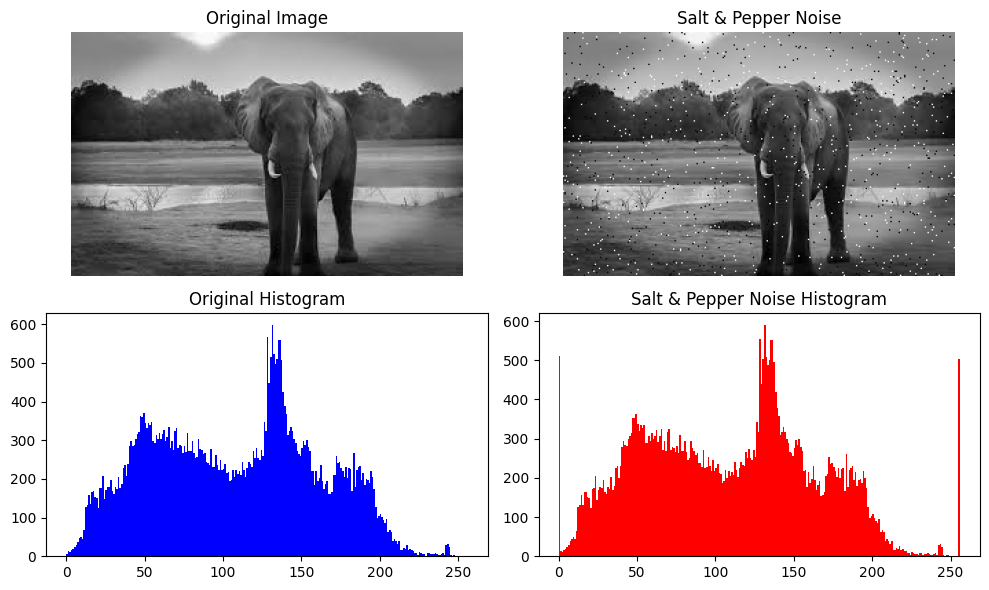

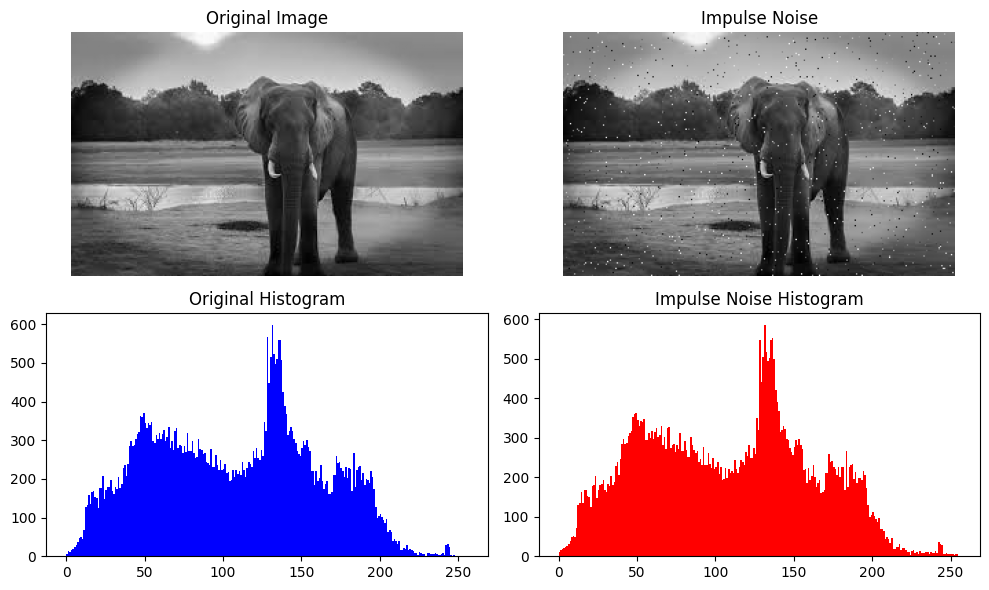

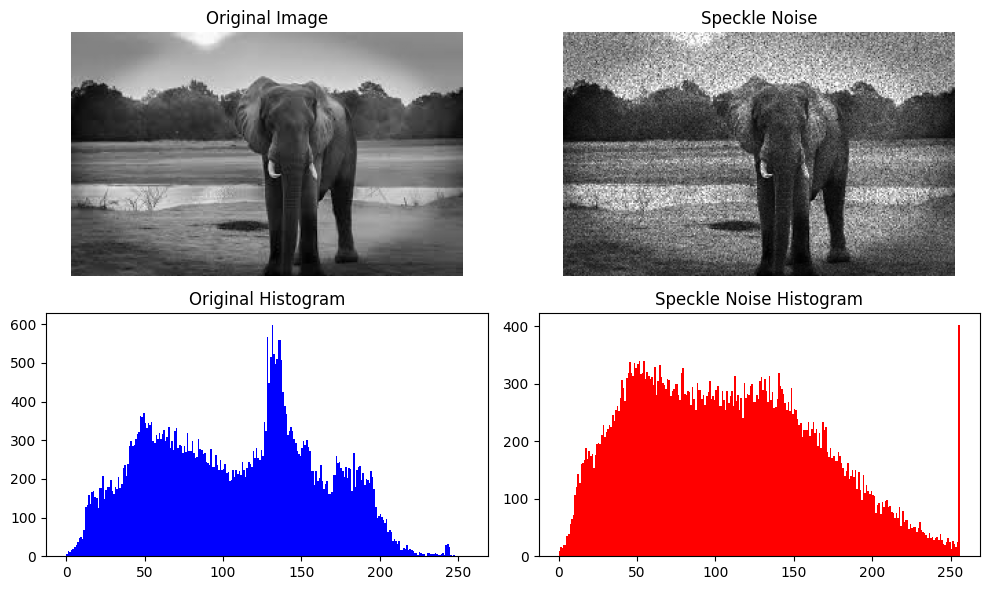

In [10]:
img_path = '/content/download (4).jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

# Apply noise types
gauss_img = add_gaussian_noise(img)
sp_img = add_salt_pepper_noise(img)
impulse_img = add_impulse_noise(img)
speckle_img = add_speckle_noise(img)

# List of noise types for plotting
noises = [
    ('Gaussian Noise', gauss_img),
    ('Salt & Pepper Noise', sp_img),
    ('Impulse Noise', impulse_img),
    ('Speckle Noise', speckle_img),
]

# Plot
for title, noisy_img in noises:
    plt.figure(figsize=(10, 6))

    # Original
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Noisy
    plt.subplot(2, 2, 2)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

    # Original Histogram
    plt.subplot(2, 2, 3)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='blue')
    plt.title("Original Histogram")

    # Noisy Histogram
    plt.subplot(2, 2, 4)
    plt.hist(noisy_img.ravel(), bins=256, range=[0, 256], color='red')
    plt.title(f"{title} Histogram")

    plt.tight_layout()
    plt.show()

Using Colab cache for faster access to the 'opencv-samples-images' dataset.

Path to dataset files: /kaggle/input/opencv-samples-images
Found 11 images in dataset.

Image 1/11: hand.jpg


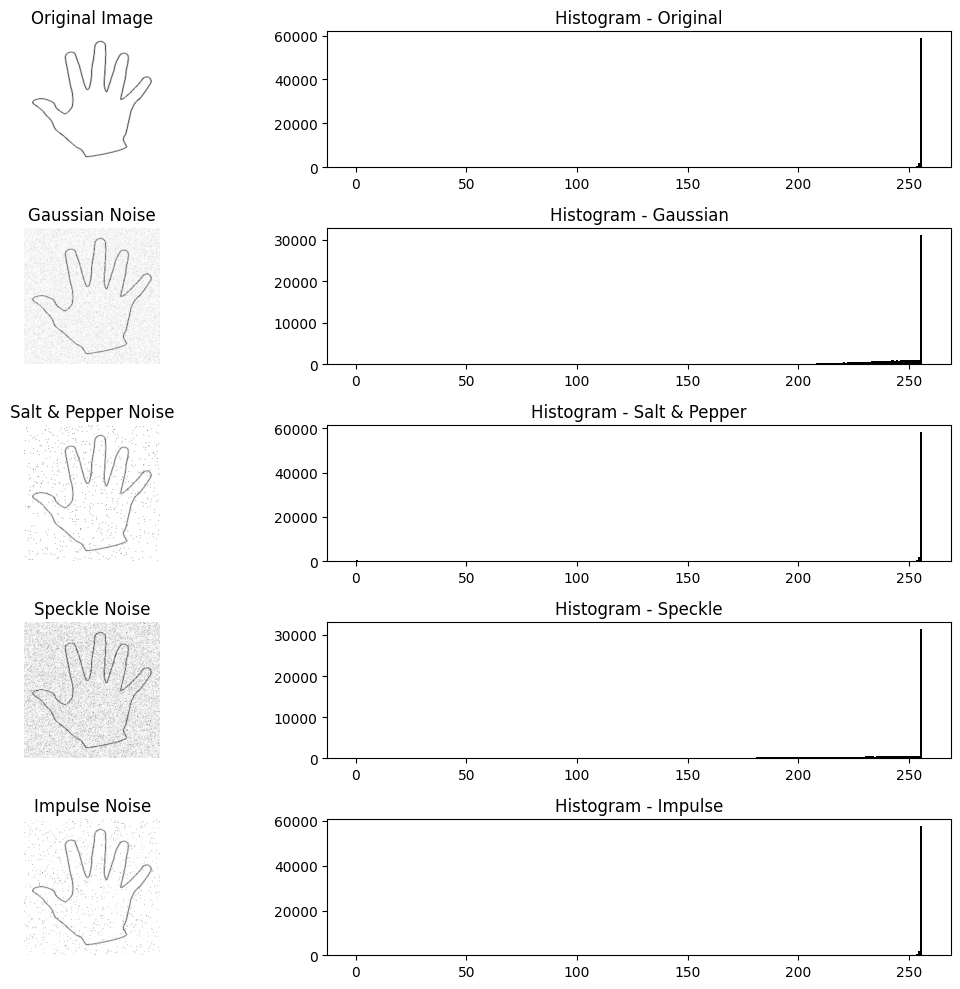


Image 2/11: house.jpg


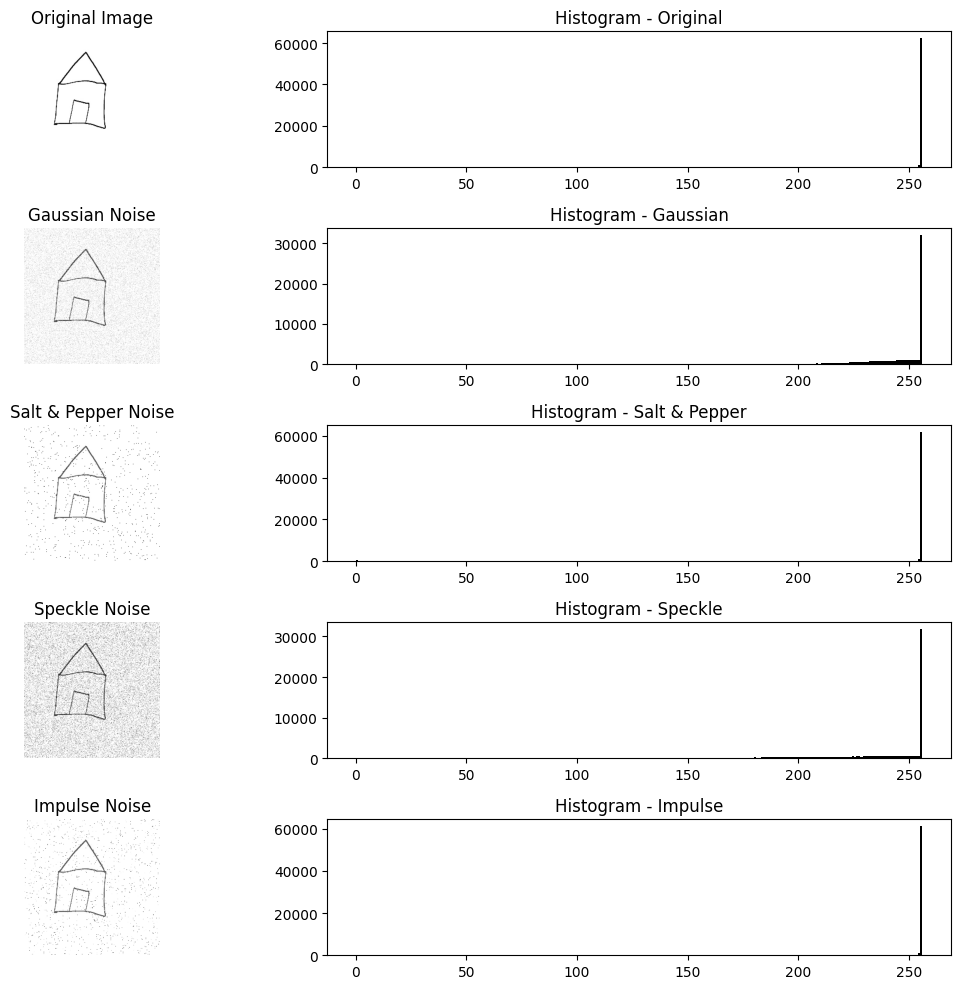


Image 3/11: someshapes.jpg


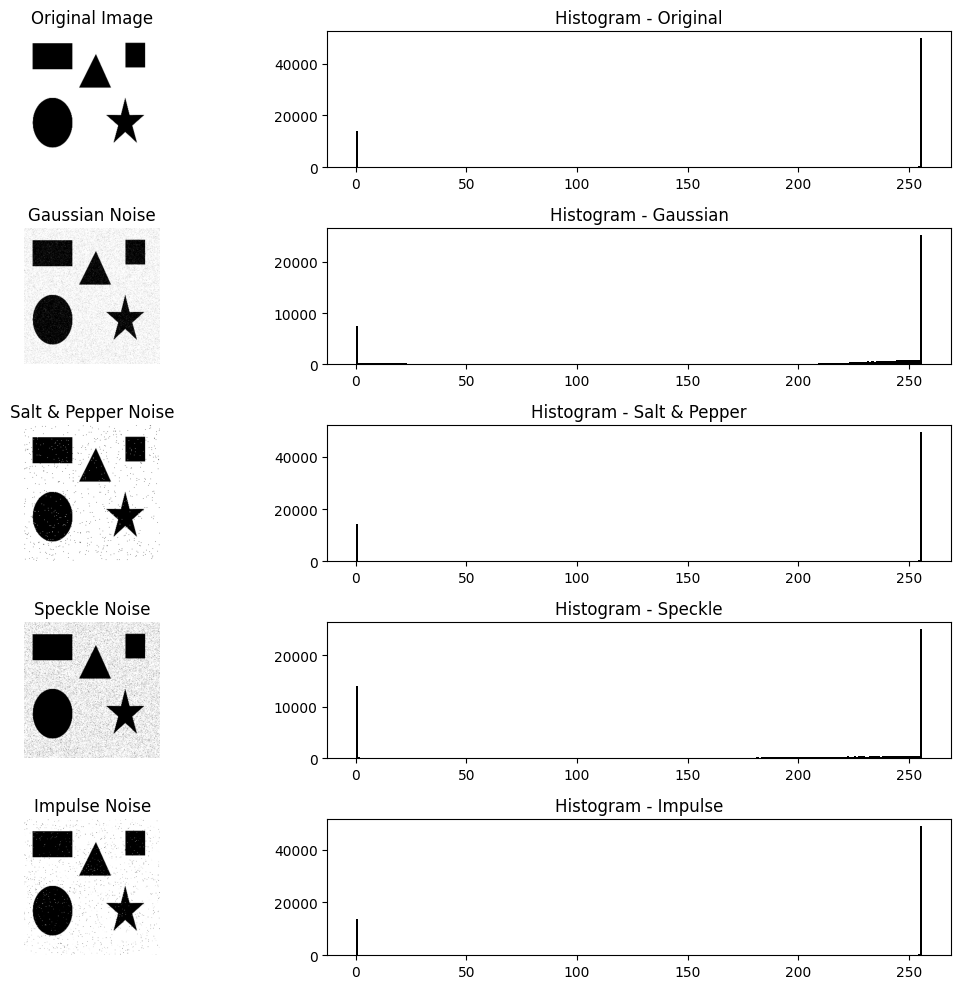


Image 4/11: Origin_of_Species.jpg


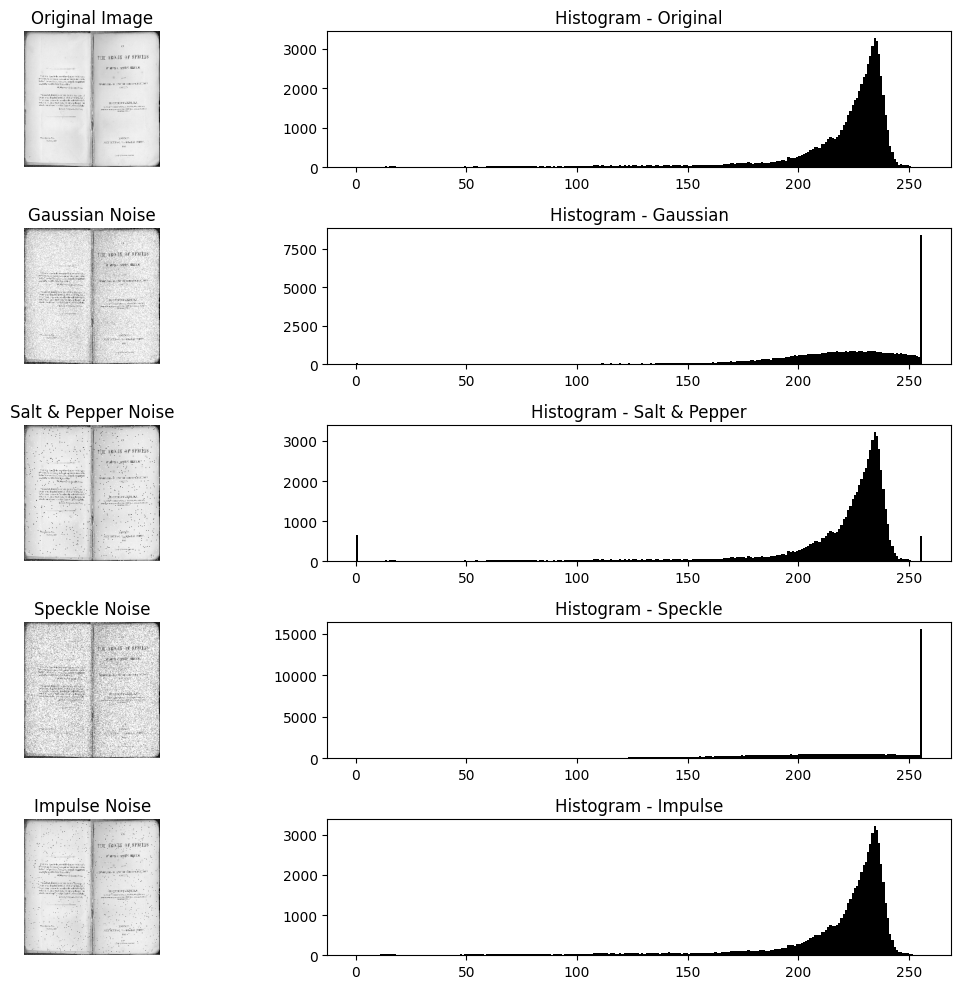


Image 5/11: Background_Subtraction_Tutorial_frame.png


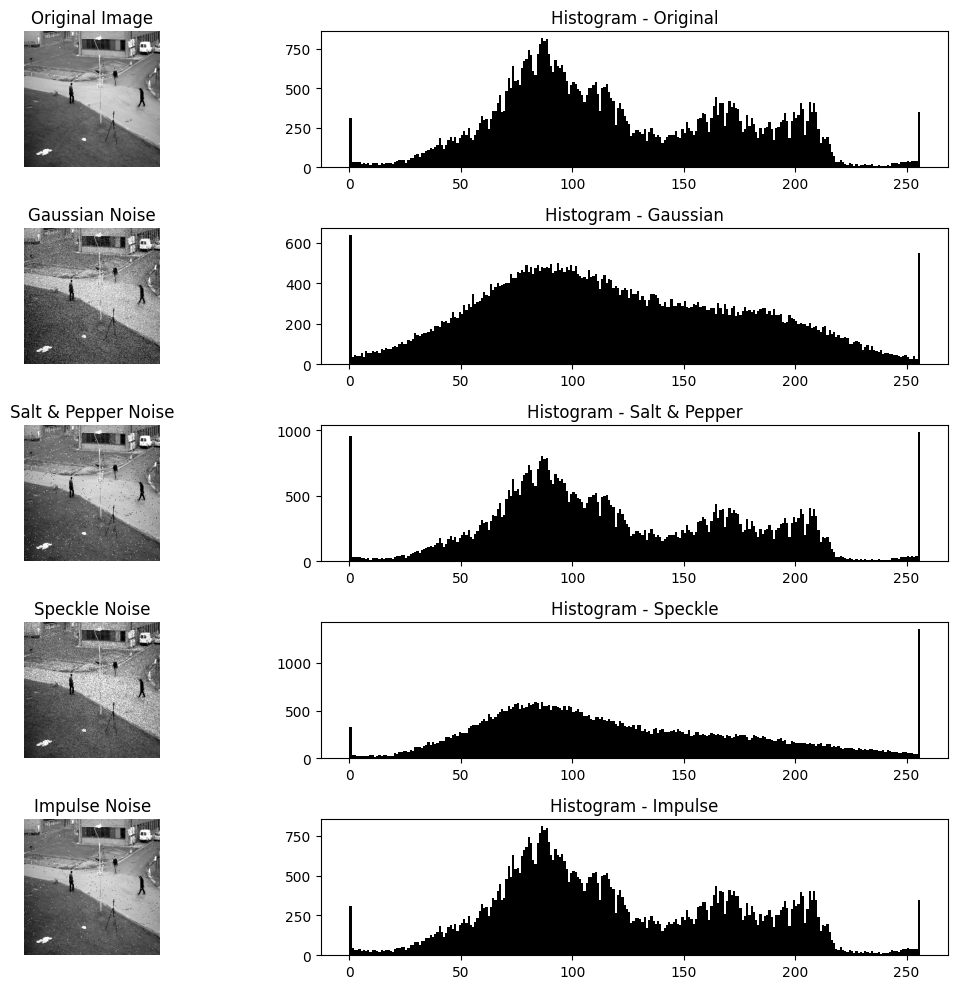


Image 6/11: scan.jpg


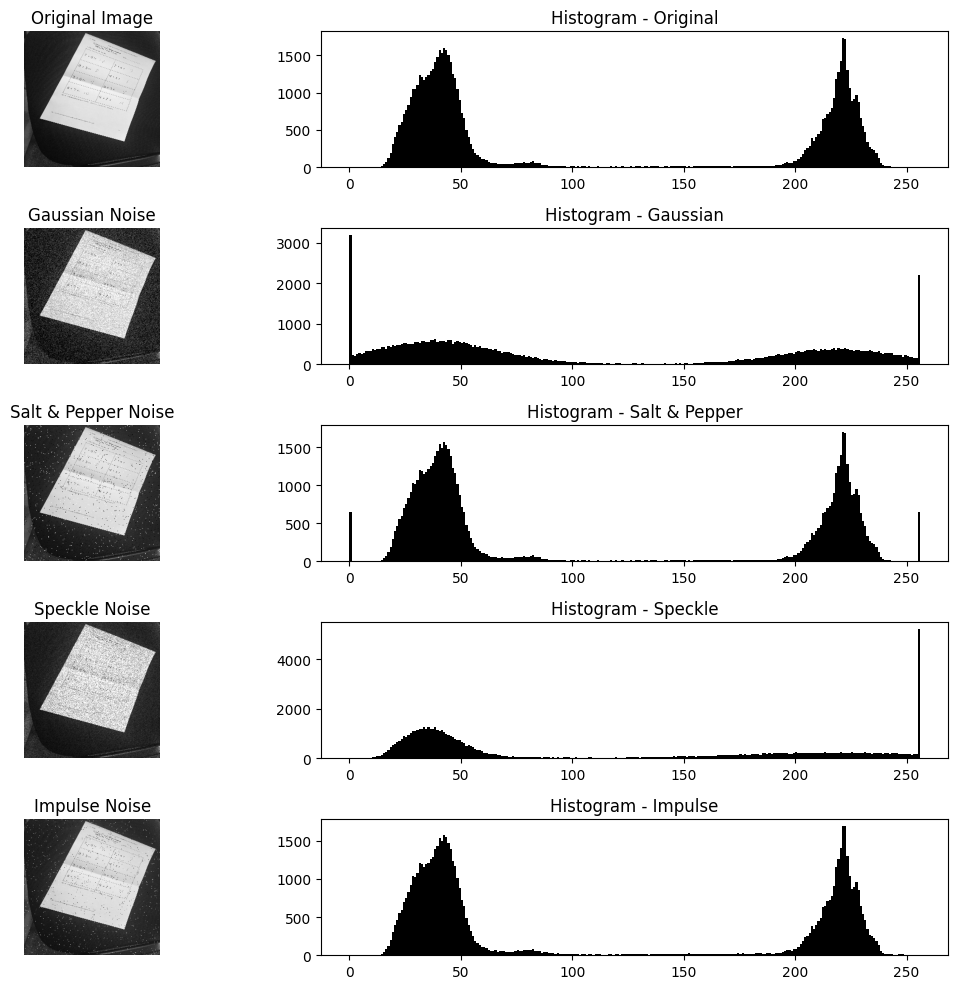


Image 7/11: minions.jpg


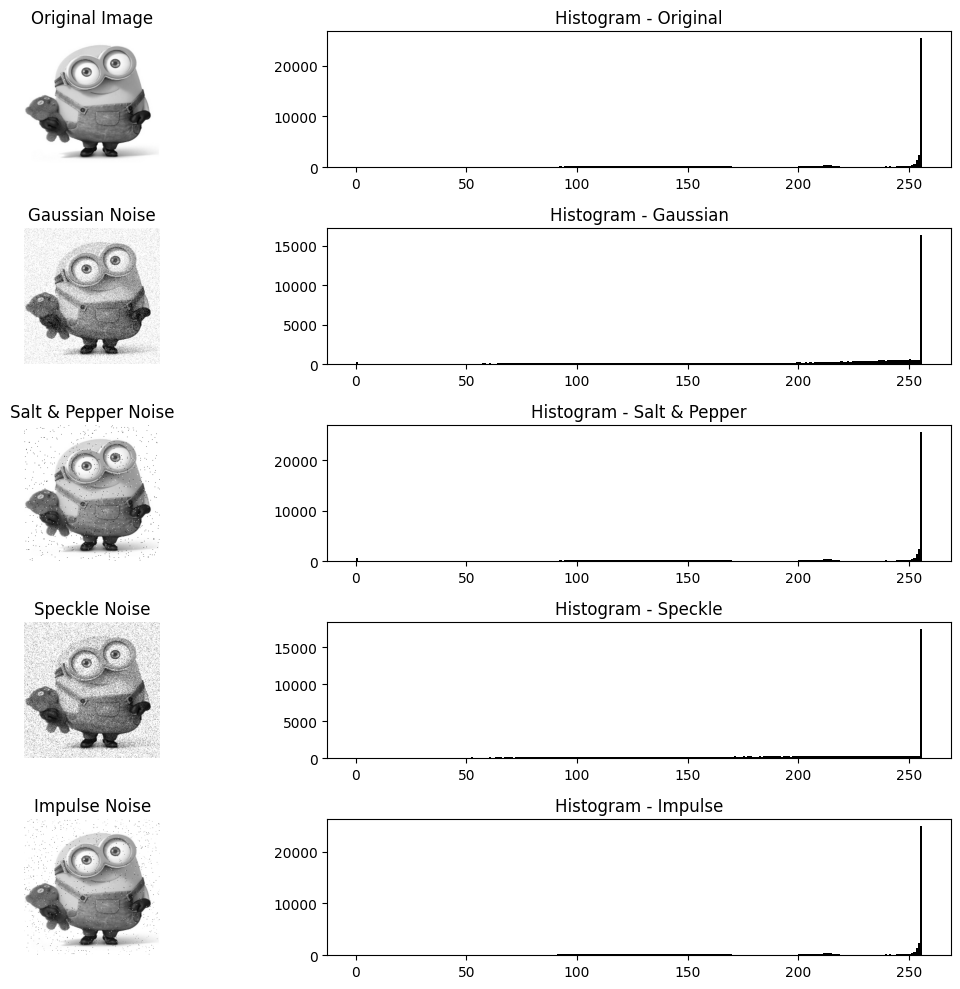


Image 8/11: waldo.jpg


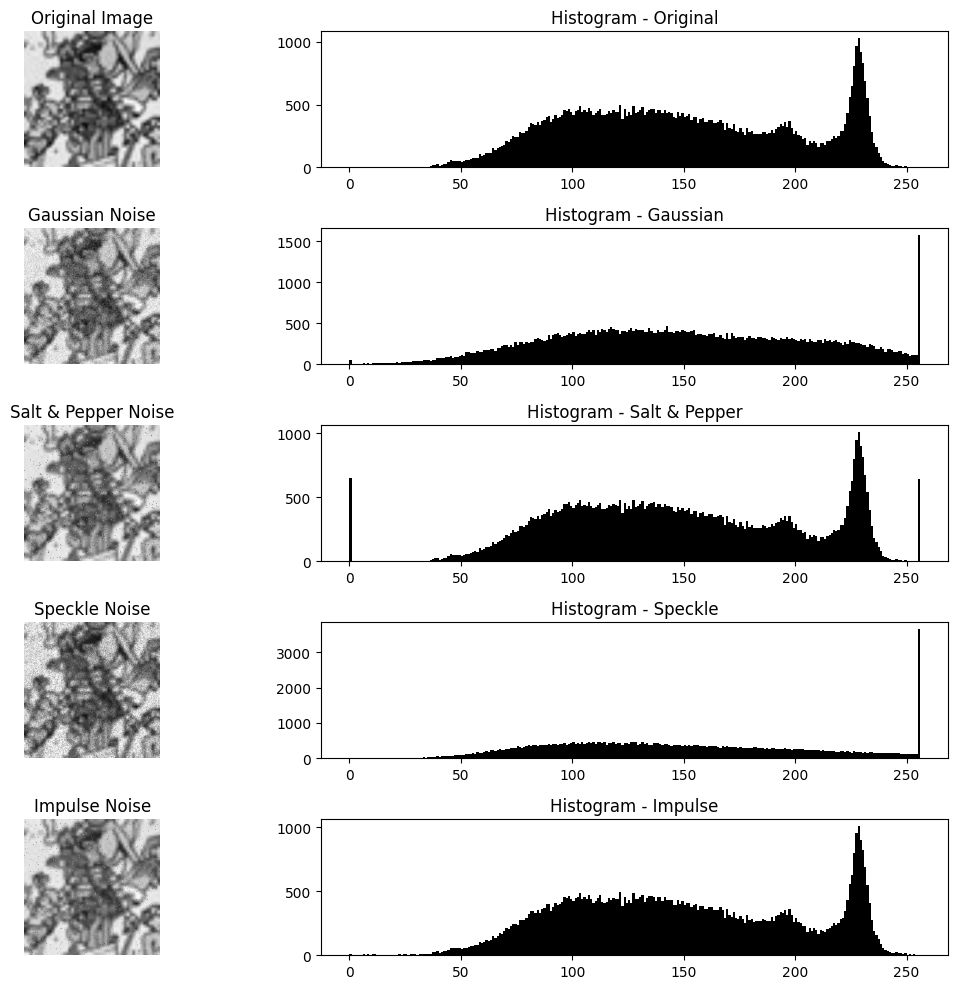


Image 9/11: blobs.jpg


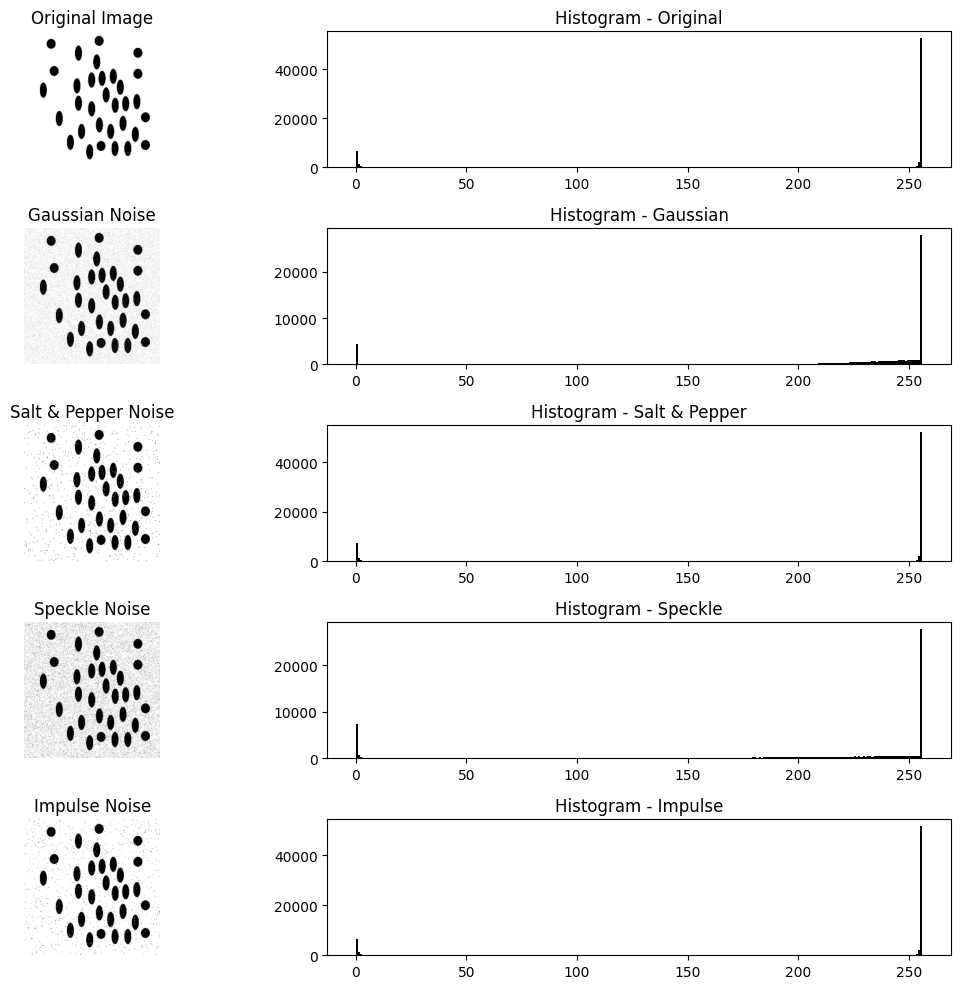


Image 10/11: Background_Subtraction_Tutorial_frame_1.png


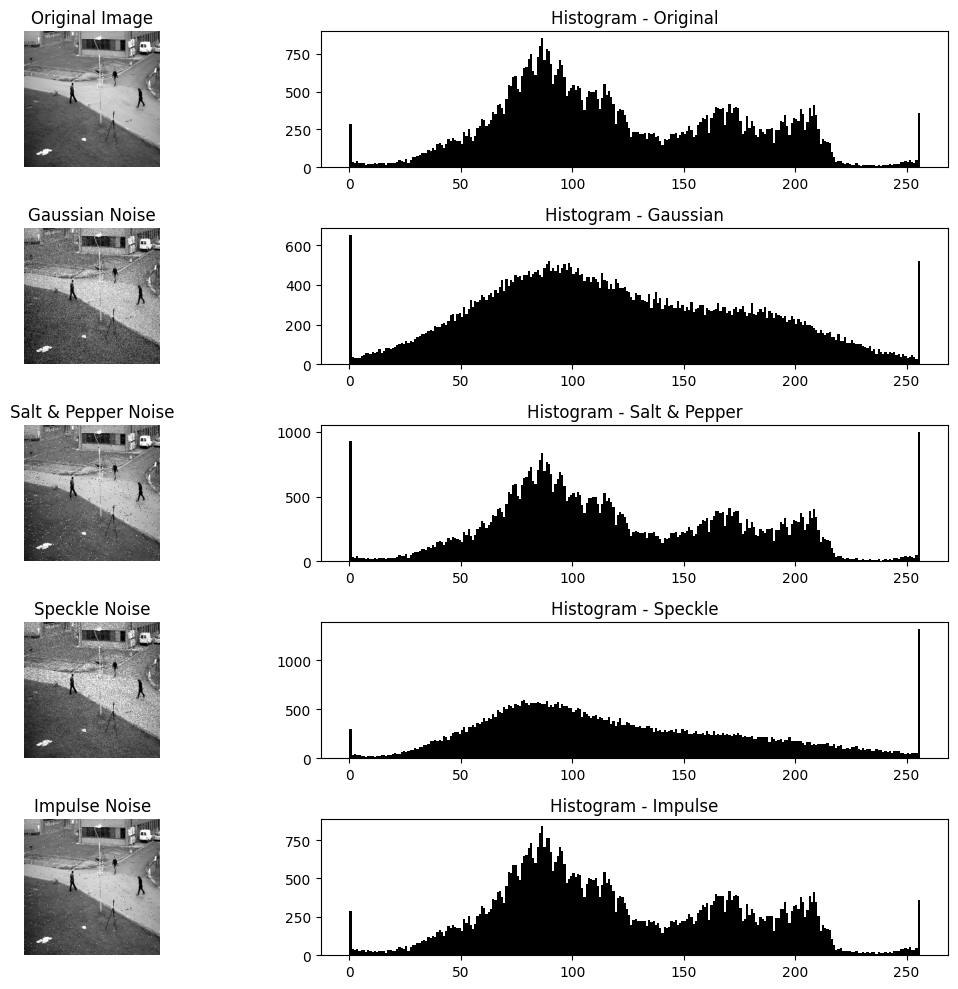


Image 11/11: WaldoBeach.jpg


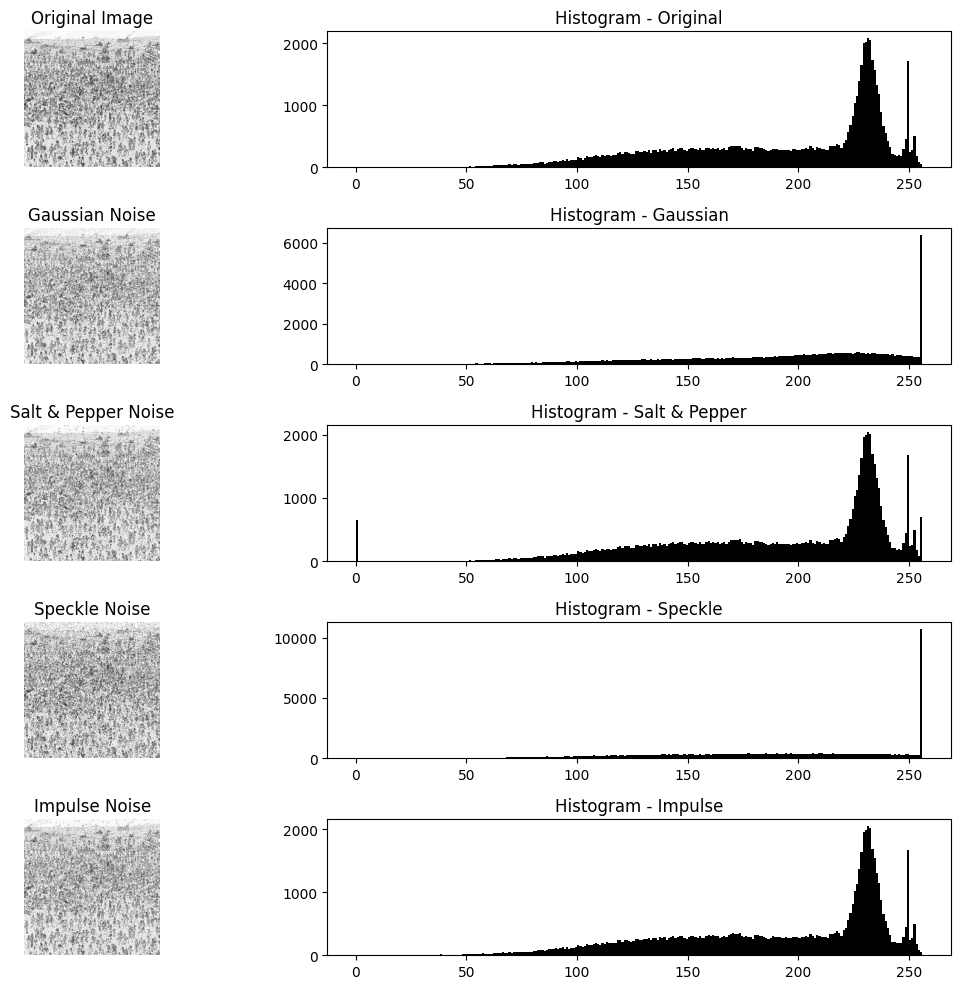

In [11]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("bulentsiyah/opencv-samples-images")
print("\nPath to dataset files:", path)

# List image files
image_files = [os.path.join(path, f) for f in os.listdir(path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print("Found", len(image_files), "images in dataset.")

# Resize to a standard size for consistent output
IMAGE_SIZE = (256, 256)

# Loop over each image
for i, file in enumerate(image_files):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue

    img = cv2.resize(img, IMAGE_SIZE)

    print(f"\n======================")
    print(f"Image {i+1}/{len(image_files)}: {os.path.basename(file)}")
    print(f"======================")

    # Apply noises
    gaussian = add_gaussian_noise(img)
    sp = add_salt_pepper_noise(img)
    speckle = add_speckle_noise(img)
    impulse = add_impulse_noise(img)

    # Plot them together
    plt.figure(figsize=(12, 10))

    # Original
    plt.subplot(5, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    plt.subplot(5, 2, 2)
    plt.hist(img.ravel(), bins=256, range=[0, 256], color='black')
    plt.title("Histogram - Original")

    # Gaussian
    plt.subplot(5, 2, 3)
    plt.imshow(gaussian, cmap='gray')
    plt.title("Gaussian Noise")
    plt.axis("off")
    plt.subplot(5, 2, 4)
    plt.hist(gaussian.ravel(), bins=256, range=[0, 256], color='black')
    plt.title("Histogram - Gaussian")

    # Salt & Pepper
    plt.subplot(5, 2, 5)
    plt.imshow(sp, cmap='gray')
    plt.title("Salt & Pepper Noise")
    plt.axis("off")
    plt.subplot(5, 2, 6)
    plt.hist(sp.ravel(), bins=256, range=[0, 256], color='black')
    plt.title("Histogram - Salt & Pepper")

    # Speckle
    plt.subplot(5, 2, 7)
    plt.imshow(speckle, cmap='gray')
    plt.title("Speckle Noise")
    plt.axis("off")
    plt.subplot(5, 2, 8)
    plt.hist(speckle.ravel(), bins=256, range=[0, 256], color='black')
    plt.title("Histogram - Speckle")

    # Impulse
    plt.subplot(5, 2, 9)
    plt.imshow(impulse, cmap='gray')
    plt.title("Impulse Noise")
    plt.axis("off")
    plt.subplot(5, 2, 10)
    plt.hist(impulse.ravel(), bins=256, range=[0, 256], color='black')
    plt.title("Histogram - Impulse")

    plt.tight_layout()
    plt.show()